In [1]:
"""
This notebook is for visualizing the data.

Will p
"""
print('')

# Loading Tabular Data

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns', 100)
sns.set(color_codes=True)

import importlib
import visualization_funcs as vf
importlib.reload(vf)

from PIL import Image
from wordcloud import WordCloud

In [3]:
# paths
start_path = '../data'
breed_labels = start_path + '/breed_labels.csv'
color_labels = start_path + '/color_labels.csv'
state_labels = start_path + '/state_labels.csv'
data = start_path + '/train.csv'

## Breed Labels

In [4]:
breed_labels_df = pd.read_csv(breed_labels)
breed_labels_df.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [5]:
breed_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 3 columns):
BreedID      307 non-null int64
Type         307 non-null int64
BreedName    307 non-null object
dtypes: int64(2), object(1)
memory usage: 7.3+ KB


## Color Labels

In [6]:
color_labels_df = pd.read_csv(color_labels)
color_labels_df

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [7]:
color_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
ColorID      7 non-null int64
ColorName    7 non-null object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


## State Labels

In [8]:
state_labels_df = pd.read_csv(state_labels)
state_labels_df

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [9]:
state_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
StateID      15 non-null int64
StateName    15 non-null object
dtypes: int64(1), object(1)
memory usage: 320.0+ bytes


## Features

In [10]:
data_df = pd.read_csv(data)
data_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [14]:
data_df_cat = vf.map_num_to_cat(data_df)
data_df_cat.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,Cat,Nibble,3,Tabby,0,Male,Black,White,0,Small,Short,No,No,No,Healthy,1,100,Selangor,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,Cat,No Name Yet,1,Domestic Medium Hair,0,Male,Black,Brown,0,Medium,Medium,Not Sure,Not Sure,Not Sure,Healthy,1,0,Kuala Lumpur,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,Dog,Brisco,1,Mixed Breed,0,Male,Brown,White,0,Medium,Medium,Yes,Yes,No,Healthy,1,0,Selangor,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,Dog,Miko,4,Mixed Breed,0,Female,Black,Brown,0,Medium,Short,Yes,Yes,No,Healthy,1,150,Kuala Lumpur,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,Dog,Hunter,1,Mixed Breed,0,Male,Black,0,0,Medium,Short,No,No,No,Healthy,1,0,Selangor,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [15]:
data_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null category
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null category
Breed2           14993 non-null category
Gender           14993 non-null category
Color1           14993 non-null category
Color2           14993 non-null category
Color3           14993 non-null category
MaturitySize     14993 non-null category
FurLength        14993 non-null category
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null category
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt 

# Visualize Individual Tabular Data

In [18]:
vf.num_unique_values(data_df_cat)

col: Type 
Number of Unique Values: 2
col: Name 
Number of Unique Values: 9061
col: Age 
Number of Unique Values: 106
col: Breed1 
Number of Unique Values: 176
col: Breed2 
Number of Unique Values: 135
col: Gender 
Number of Unique Values: 3
col: Color1 
Number of Unique Values: 7
col: Color2 
Number of Unique Values: 7
col: Color3 
Number of Unique Values: 6
col: MaturitySize 
Number of Unique Values: 4
col: FurLength 
Number of Unique Values: 3
col: Vaccinated 
Number of Unique Values: 3
col: Dewormed 
Number of Unique Values: 3
col: Sterilized 
Number of Unique Values: 3
col: Health 
Number of Unique Values: 3
col: Quantity 
Number of Unique Values: 19
col: Fee 
Number of Unique Values: 74
col: State 
Number of Unique Values: 14
col: RescuerID 
Number of Unique Values: 5595
col: VideoAmt 
Number of Unique Values: 9
col: Description 
Number of Unique Values: 14033
col: PetID 
Number of Unique Values: 14993
col: PhotoAmt 
Number of Unique Values: 31
col: AdoptionSpeed 
Number of Uniqu

## Histograms and Bar Graphs

Bar Graphs:


 Vaccinated 



/Users/jinli/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


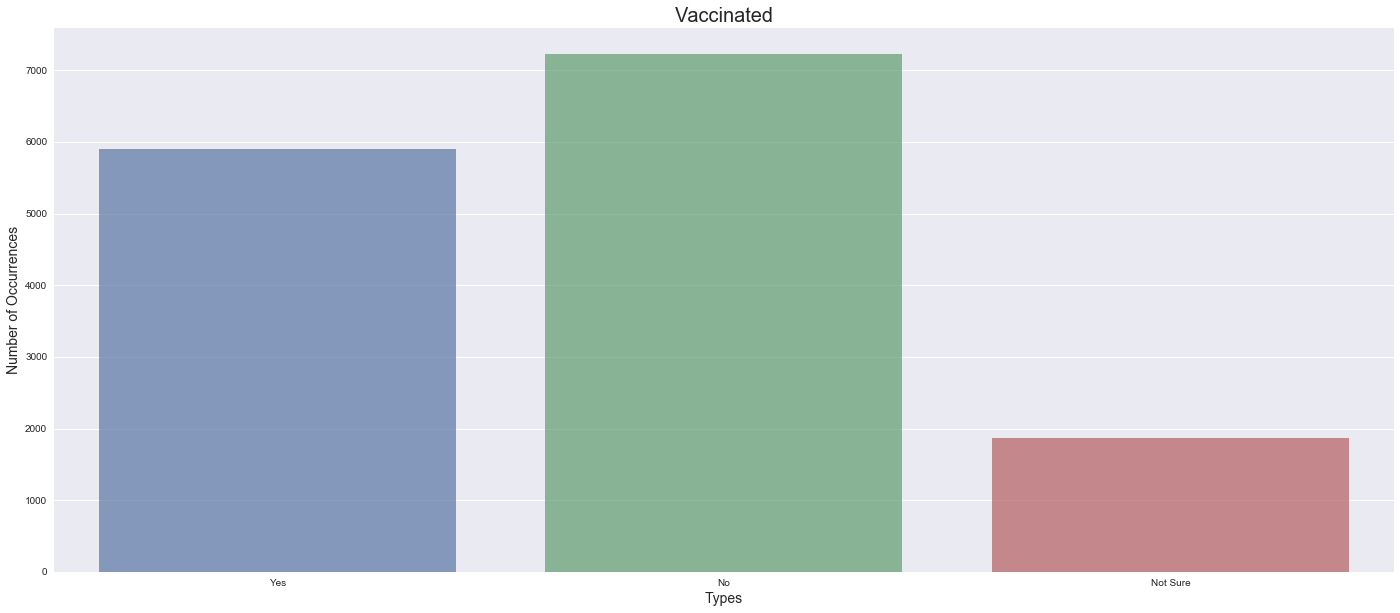


 VideoAmt 



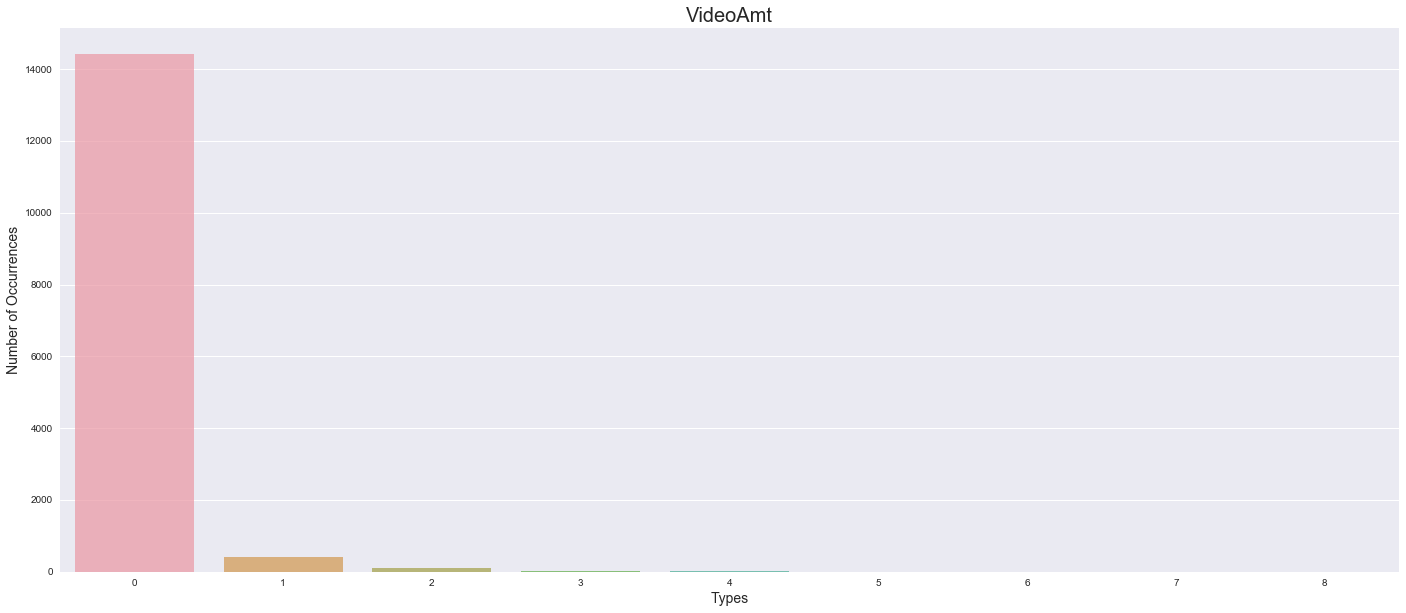


 Health 



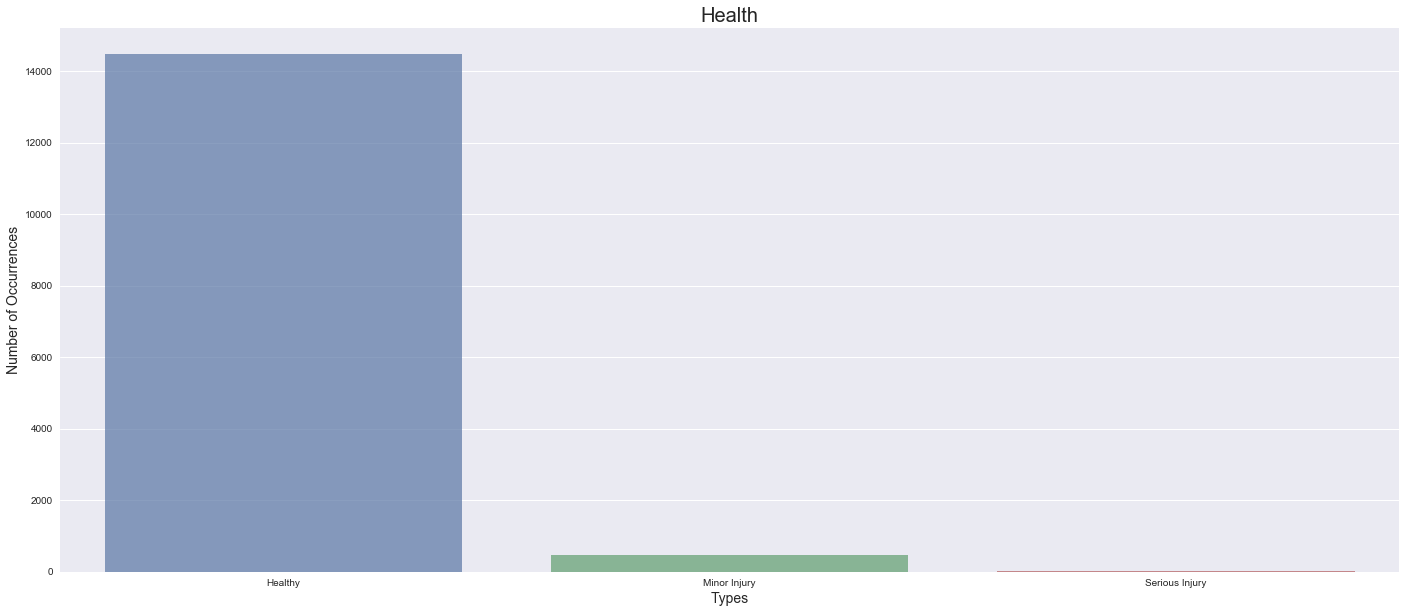


 Type 



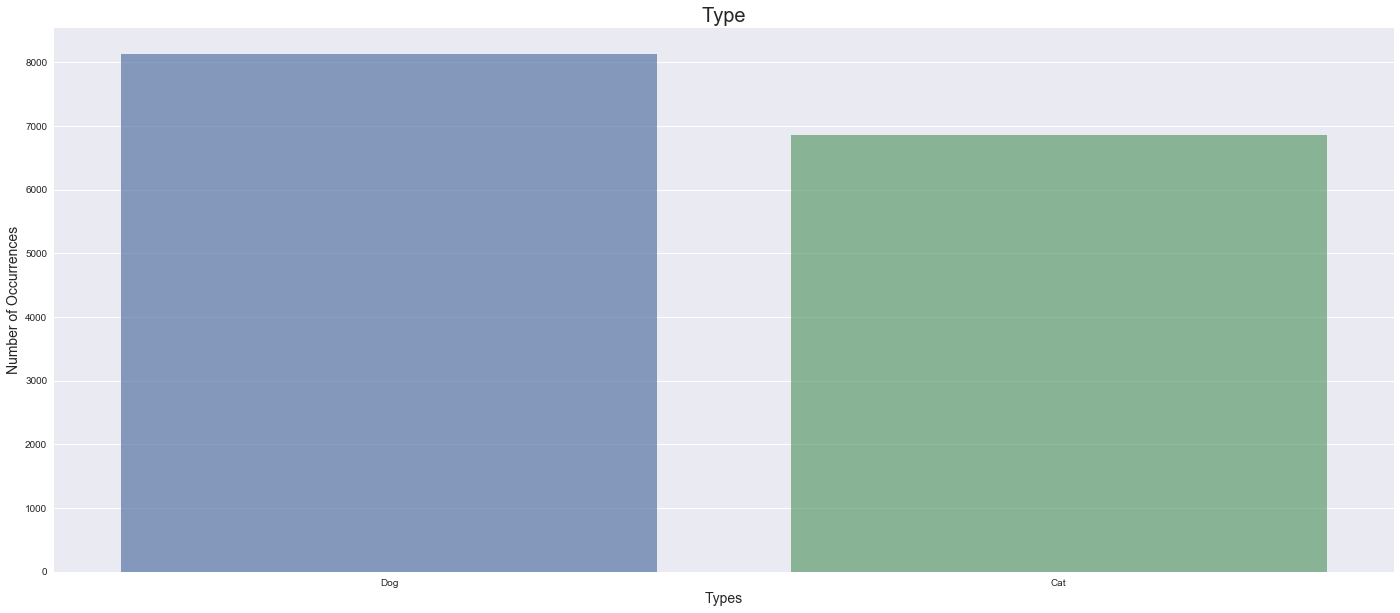


 FurLength 



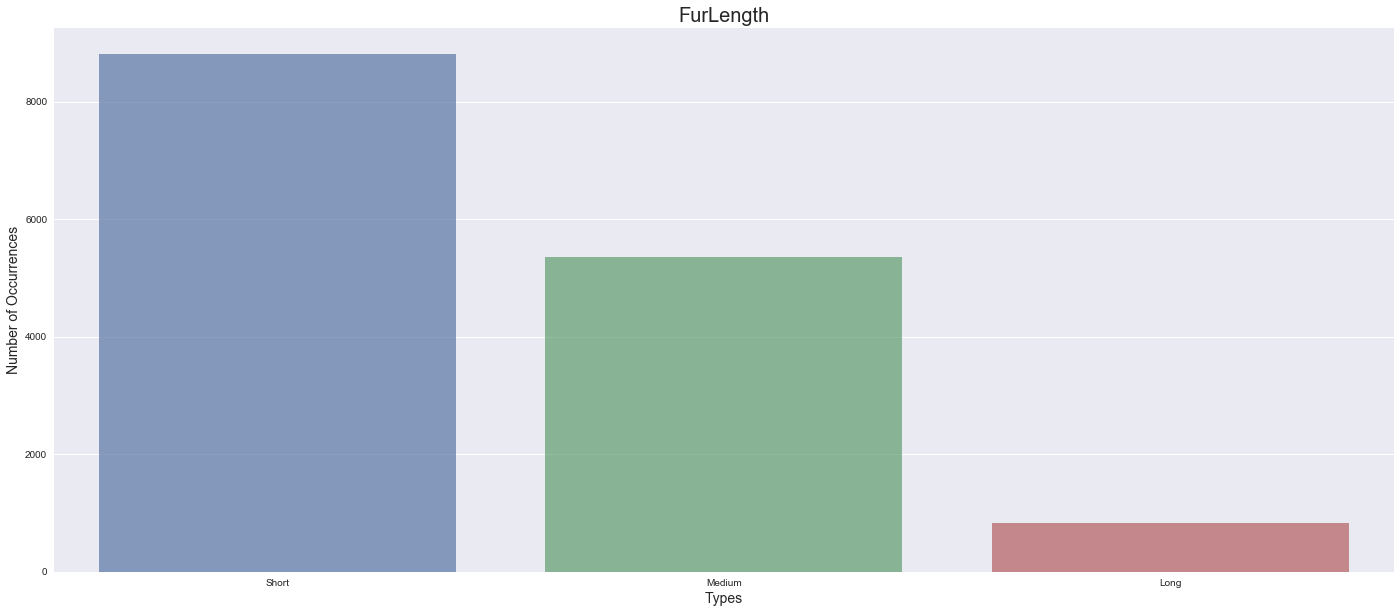


 AdoptionSpeed 



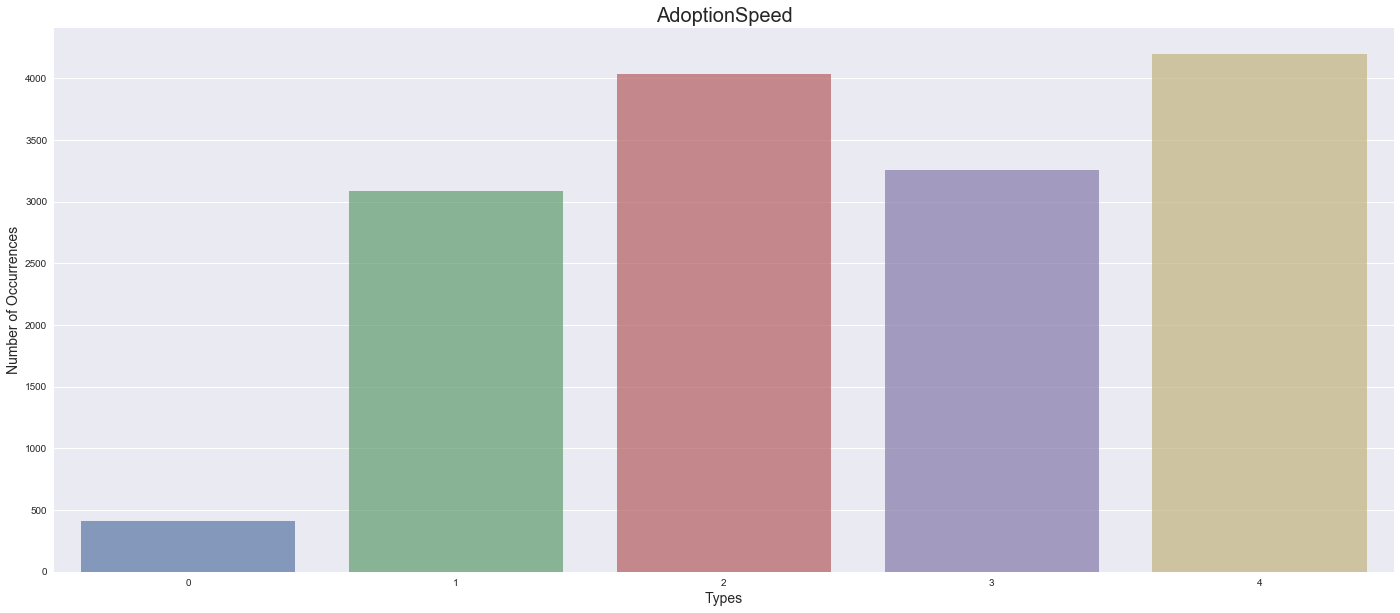


 Sterilized 



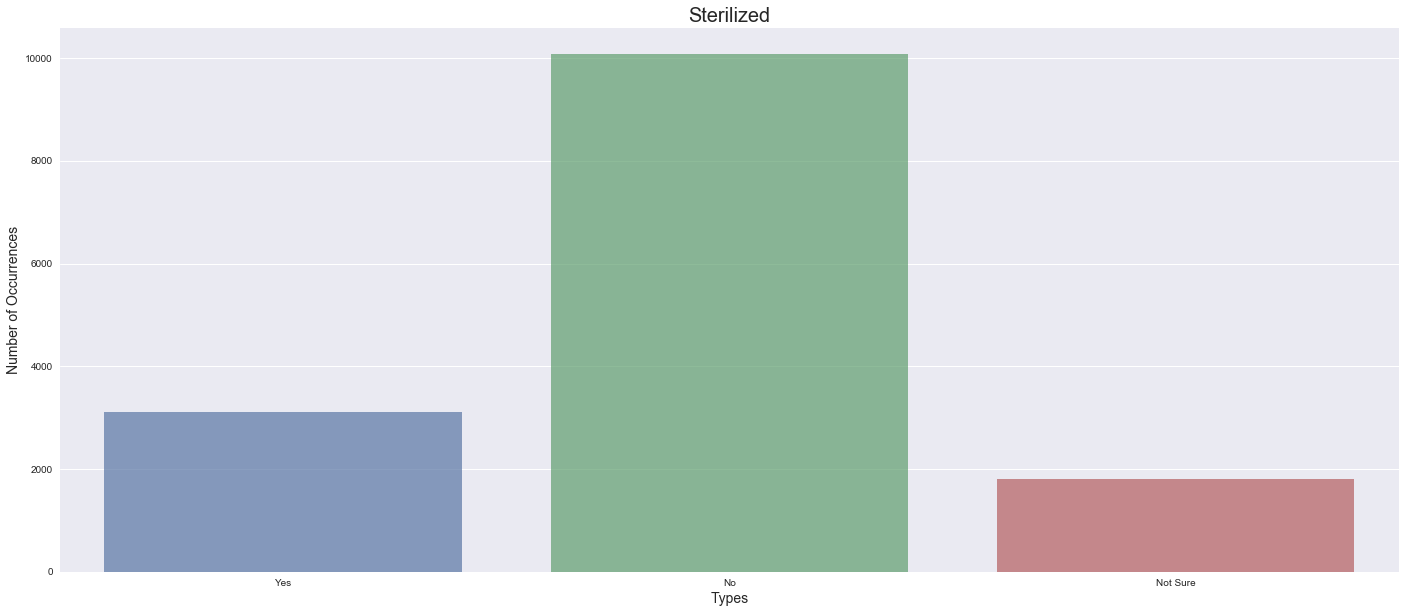


 Color1 



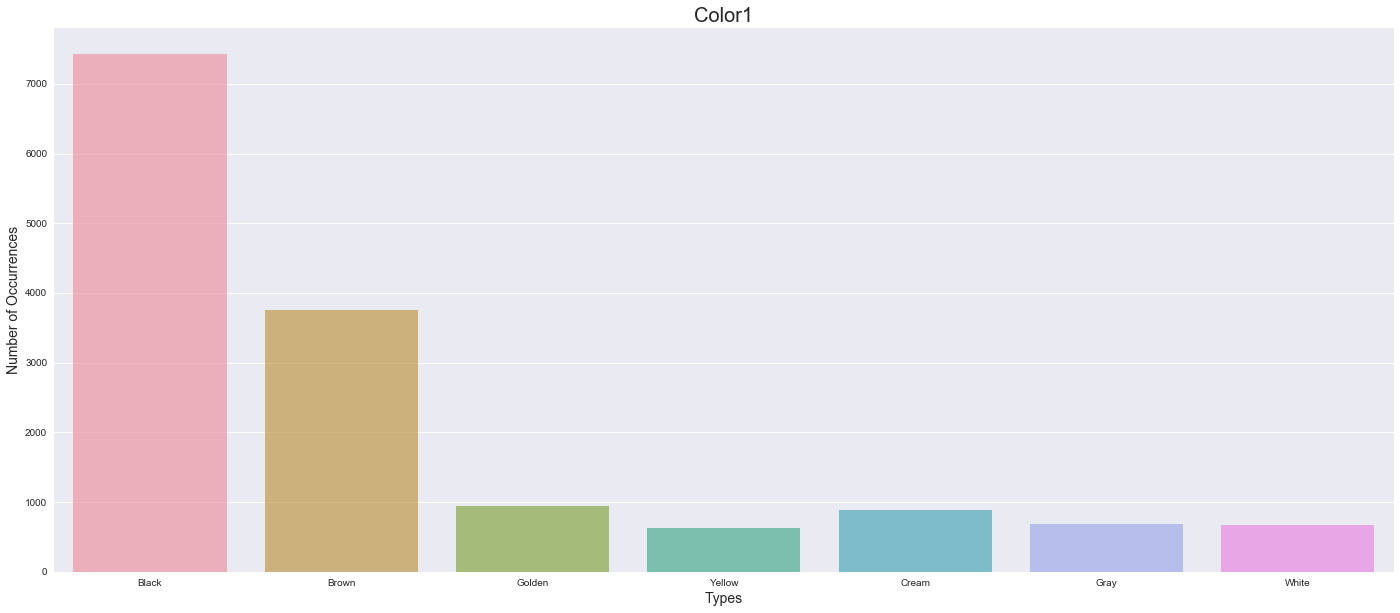


 Color3 



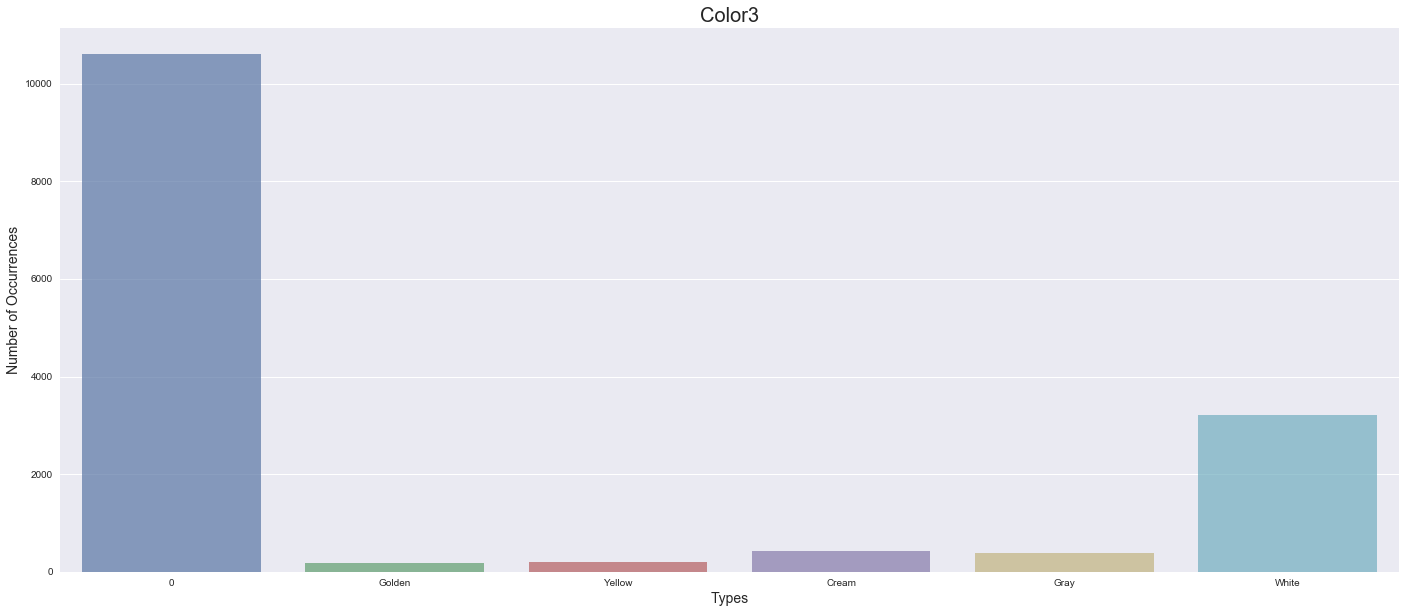


 Color2 



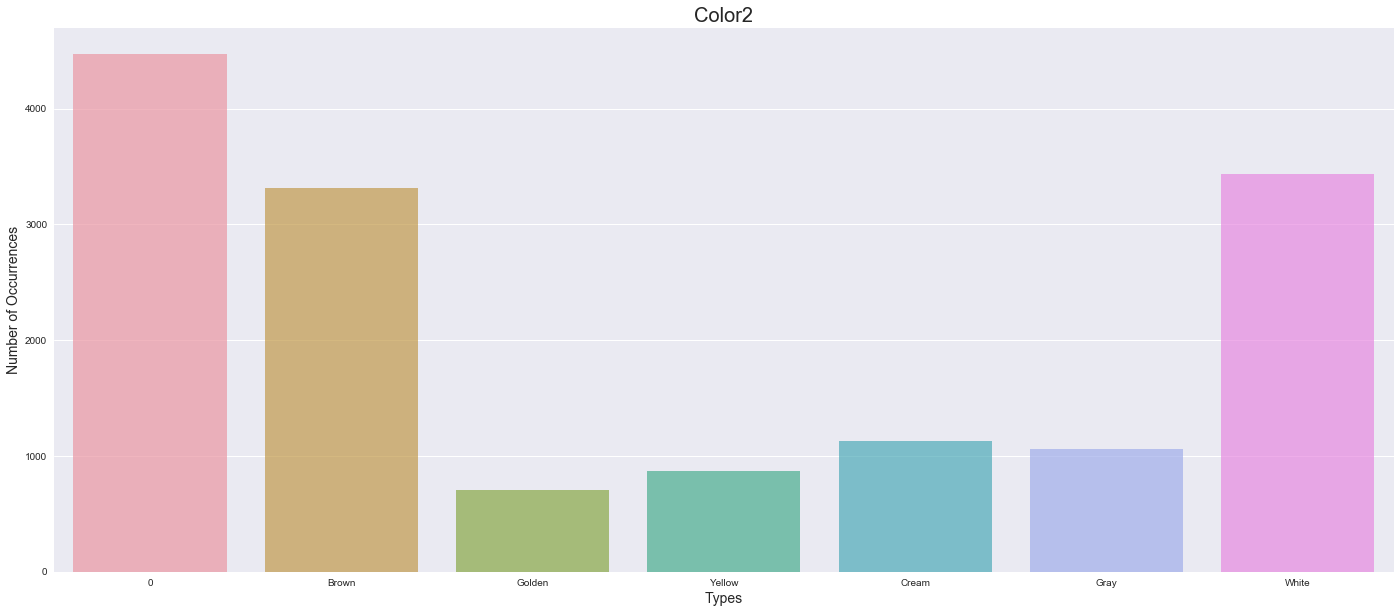


 MaturitySize 



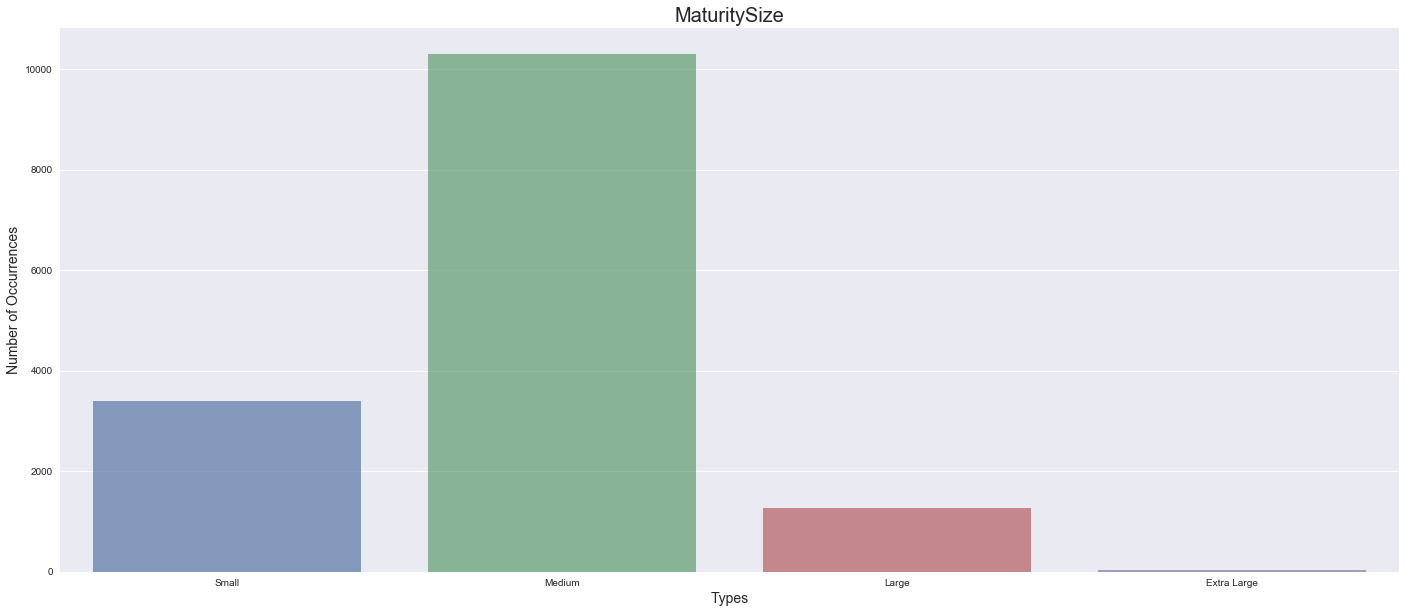


 Gender 



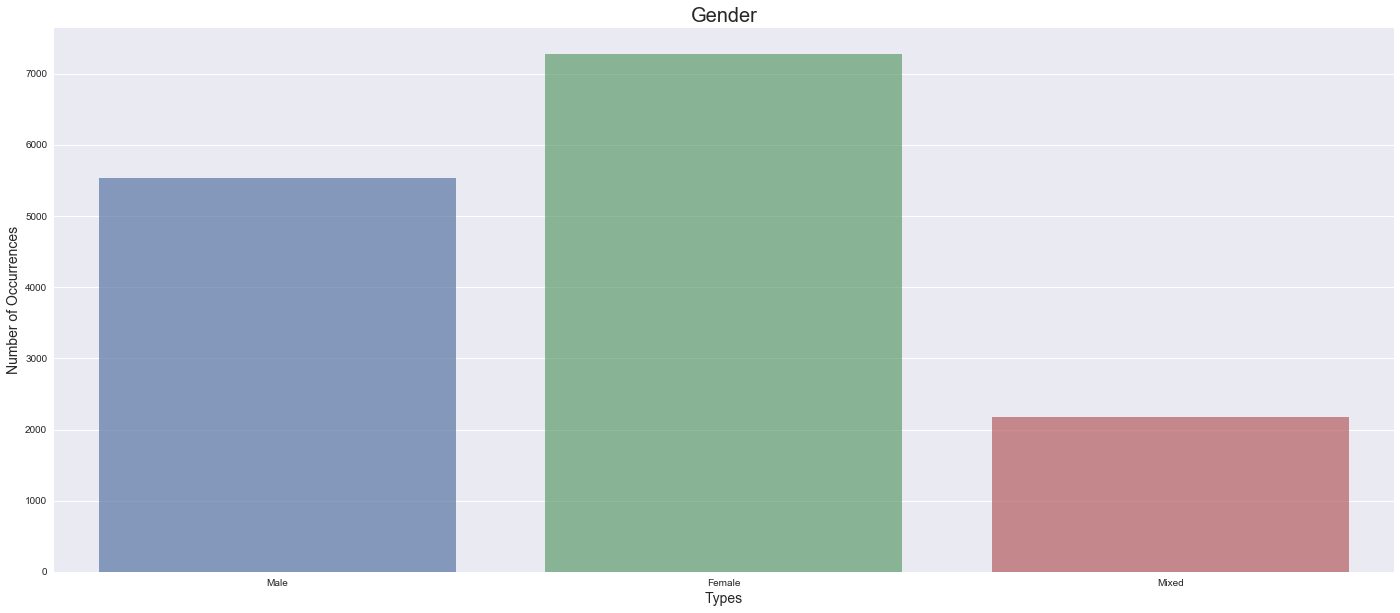


 PhotoAmt 



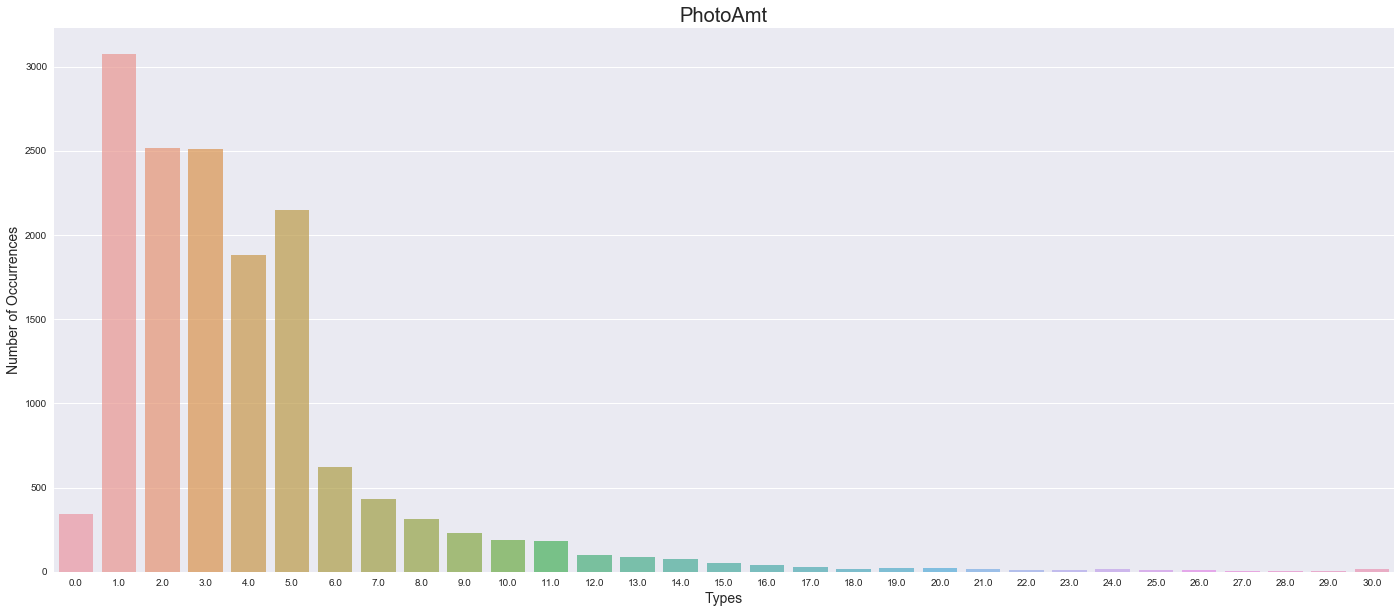


 Dewormed 



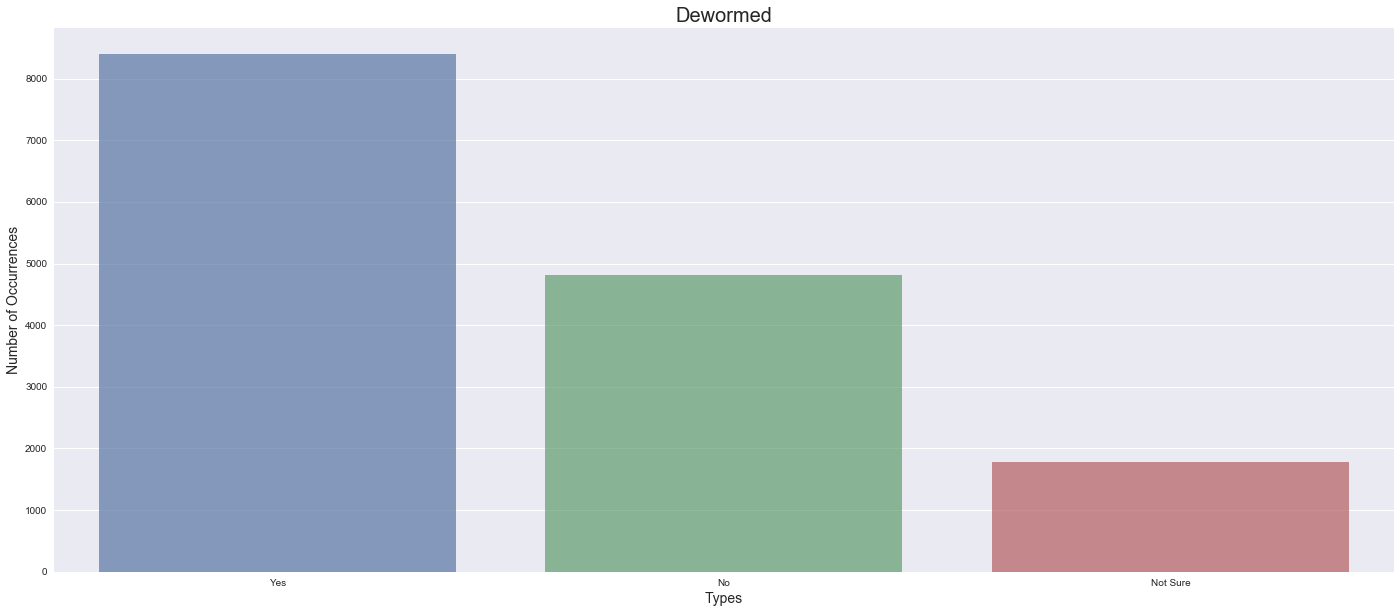


 State 



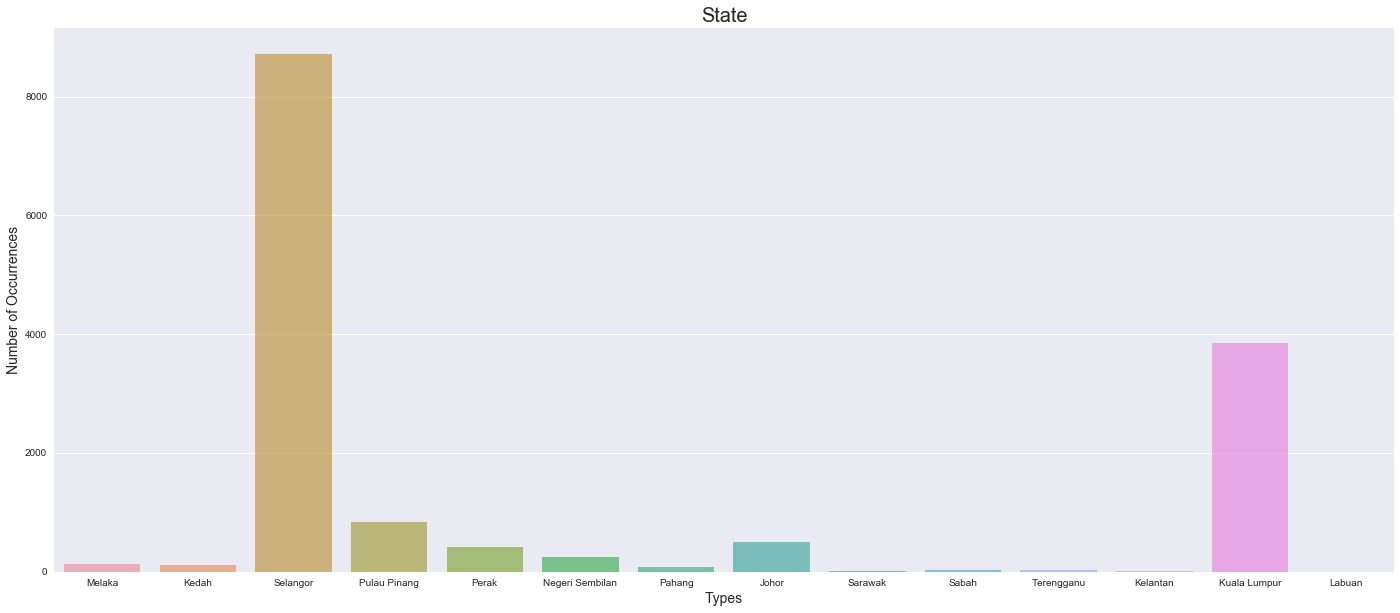

Histograms:


 Quantity 



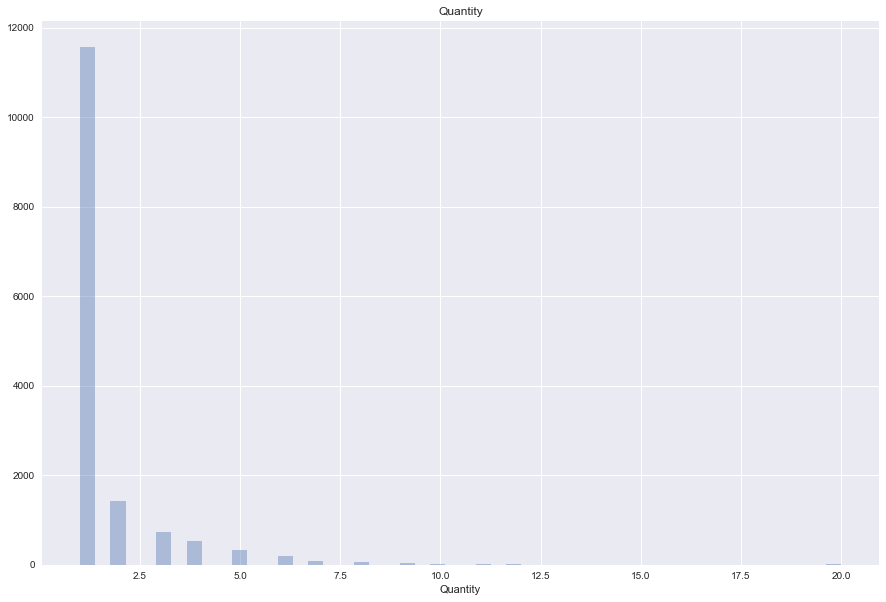


 Fee 



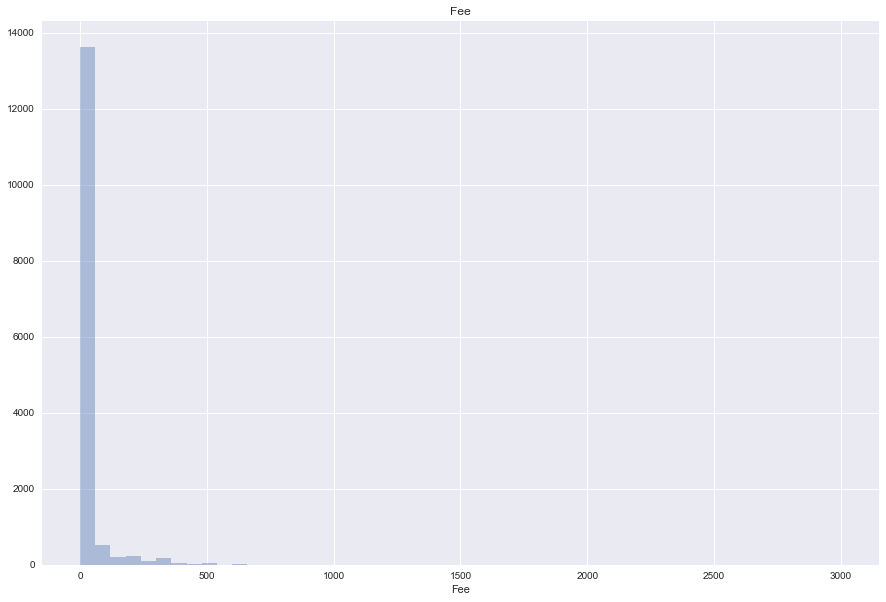


 Age 



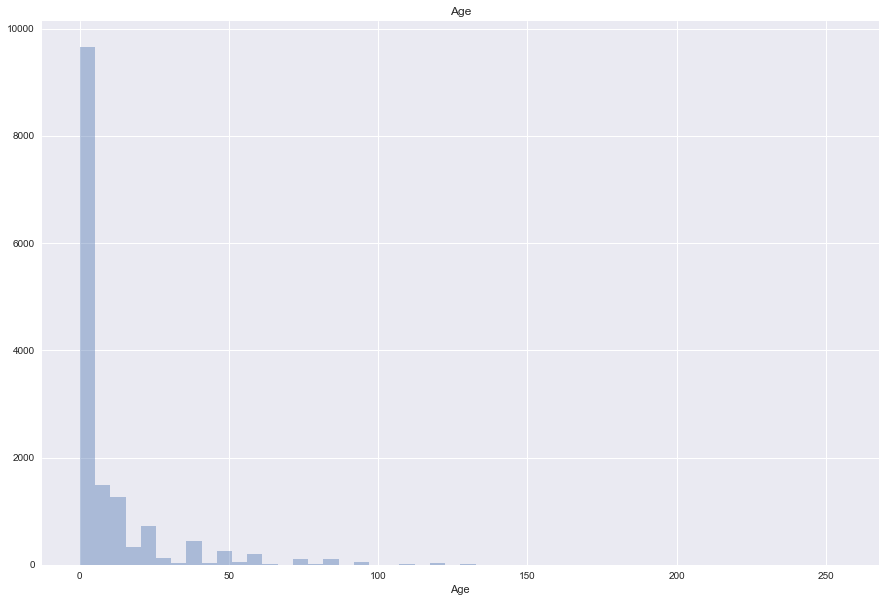

Head Counts:


 Breed1 

Mixed Breed             5927
Domestic Short Hair     3634
Domestic Medium Hair    1258
Tabby                    342
Domestic Long Hair       296
Name: Breed1, dtype: int64

 Name 

Baby       66
Lucky      64
Brownie    54
No Name    54
Mimi       52
Name: Name, dtype: int64

 Breed2 

0                       10762
Mixed Breed              1727
Domestic Short Hair       599
Domestic Medium Hair      321
Tabby                     138
Name: Breed2, dtype: int64

Columns Not Plotted: {'Description', 'RescuerID', 'PetID'}


In [19]:
vf.plot_inputs(
    data_df_cat,
    {
        'Type', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated',
        'Dewormed', 'Sterilized', 'Health', 'State', 'VideoAmt',
        'PhotoAmt', 'AdoptionSpeed', 'Color3', 'Color1', 'Color2'
    },
    {
        'Age', 'Quantity', 'Fee'
    },
    {
        'Breed1', 'Breed2', 'Name'
    }
)

## Word Clouds

### Word Cloud For Names

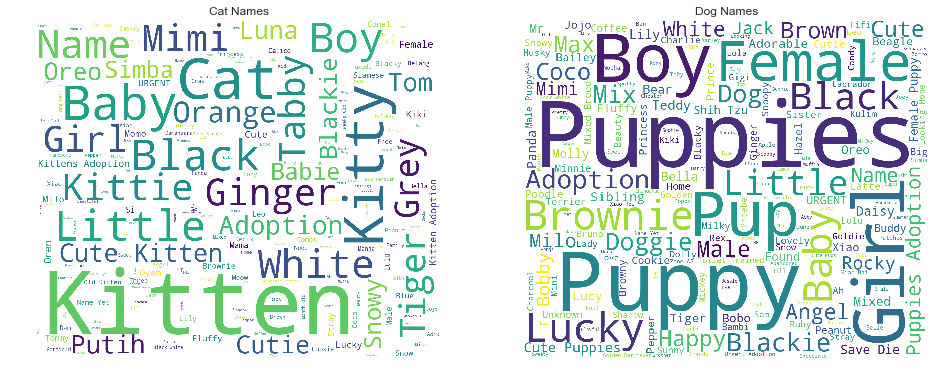

In [83]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(
    data_df_cat.loc[data_df_cat['Type'] == 'Cat', 'Name'].fillna('').values
)
vf.generate_word_clouds(text_cat, 'Cat Names')

plt.subplot(1, 2, 2)
text_dog = ' '.join(
    data_df_cat.loc[data_df_cat['Type'] == 'Dog', 'Name'].fillna('').values
)
vf.generate_word_clouds(text_dog, 'Dog Names')

In [46]:
# Names with 3 characters in it
data_df_cat[data_df_cat['Name'].apply(lambda x: len(str(x))) == 3]['Name'].unique()

array([nan, 'Max', 'Tom', 'Boy', 'Zoe', 'Cat', 'Sam', 'Mok', 'C7C', 'R11',
       'Tea', 'LEO', 'KFC', 'Leo', 'B33', 'Ice', 'Mia', 'Iko', 'Gia',
       'Ash', 'Kid', 'Rin', 'Dom', 'Ben', 'Mio', 'C2C', 'Abe', 'Lai',
       'L17', 'May', 'C5C', 'Liz', 'Bee', 'Dot', 'Any', 'Gin', 'Got',
       'Ray', 'Chi', 'Ali', 'Min', 'AB1', 'Abu', 'Ace', 'Zee', 'Gon',
       'Abi', 'Sel', 'Cha', 'Jet', 'Ted', 'Blu', 'Amy', 'Niu', 'Non',
       'Jay', 'BT8', 'Wes', 'Mou', 'Aki', 'Mei', 'Poe', 'Uyu', 'BLU',
       'Jim', 'Kin', 'Lex', 'S&P', 'Mex', 'BOY', 'Mac', 'Rum', 'BEE',
       'Ami', 'TOM', 'Eli', 'R12', 'Tim', 'Nil', 'R10', 'Gus', 'Jr.',
       'Pup', 'Eva', 'Mec', 'Dio', 'Joy', '!!.', 'Rio', 'Joe', 'Mog',
       'Ori', 'Jil', 'Ino', 'AB2', 'Hua', 'Tam', '...', 'C3C', 'Boo',
       'Opi', 'Don', 'BT3', 'BT6', 'F10', 'Soy', 'Mel', 'ROY', 'Gem',
       'Acu', 'Ito', 'Yen', 'Bon', 'Red', 'BT5', 'Ana', 'C6C', 'MIA',
       'Dog', 'Moo', 'BT1', 'Pot', 'REX', 'JOE', 'C14', 'Sky', 'One',
       'Jam', '

In [45]:
# Names with less than 3 characters in it:
data_df_cat[data_df_cat['Name'].apply(lambda x: len(str(x))) < 3]['Name'].unique()

array(['H3', 'Z3', 'C', 'BB', 'QQ', 'Y1', 'H1', 'D9', 'Y4', 'Z4', 'DD',
       'M2', 'H6', 'D4', 'JJ', 'F1', 'W7', '1F', 'Q1', '6', 'CJ', '3F',
       'KD', 'G1', 'B3', 'Cc', 'F6', 'Mk', 'A5', 'GM', 'D5', 'EE', 'A4',
       'Q4', 'B', 'CC', 'Y7', 'W6', 'A3', 'A1', 'T1', 'W1', 'M4', 'P5',
       'H2', 'GG', 'Y6', 'Z', 'D7', 'B4', 'C2', 'M8', '3', 'G2', 'ML',
       'DJ', 'PP', '8', 'OJ', 'D', 'F2', 'MJ', 'W8', 'W4', 'C1', 'W2',
       'GR', 'B1', '5', 'Fa', 'Y5', 'M', 'F5', 'Y0', 'B2', 'Q6', 'G3',
       '..', 'S1', 'Qu', 'R9', 'W3', 'R7', 'Tj', 'P3', '7', '!', 'RC',
       'Z2', 'Q3', 'A2', 'QD', 'S', '-', 'R6', 'IV', 'Mo', 'W5', 'F8',
       'M6', 'M9', 'Py', 'Rt', 'F9', 'P6', 'AJ', 'Y3', 'D6', 'T2', 'F4',
       'T3', 'YY', '99', 'F7', 'W+', 'D2', '1', '#1', 'S4', '2', 'Am',
       'P', 'P4', 'R5', 'M3', 'R3', 'JD', 'BJ', 'L', 'KC', 'VV', 'M1',
       '!.', 'V6', 'P1', 'J', 'S3', 'A6', 'Cq', 'M5', 'B5', 'J1', 'O',
       '2F', 'Q2', 'Y2', 'AB', 'A', 'Jo', 'ET', 'A9', 'ST', 'Po', 'KK'

In [ ]:
"""
Observations:

Some of the names probably aren't really names.
    For example, kitten, cat, girl, boy: probably aren't really names but are descriptions

Some pets do not have names.

Pets with 3 letters in their names may not have names that make sense.
Pets with 2 letters or less in their names definitely does not make sense.

"""
print('')

### Word Cloud For Descriptions

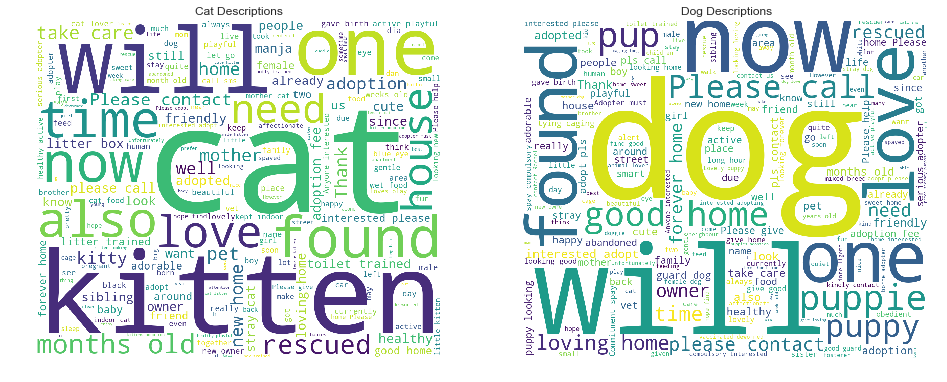

In [81]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.subplot(1, 2, 1)
text_cat = ' '.join(
    data_df_cat.loc[data_df_cat['Type'] == 'Cat', 'Description'].fillna('').values
)
vf.generate_word_clouds(text_cat, 'Cat Descriptions')

plt.subplot(1, 2, 2)
text_dog = ' '.join(
    data_df_cat.loc[data_df_cat['Type'] == 'Dog', 'Description'].fillna('').values
)
vf.generate_word_clouds(text_dog, 'Dog Descriptions')

In [ ]:
"""
Alot of mention of home.
There are also action verbs like like love, rescue, contact, call.
Feeling of immediacy, like words like now.
"""
print('')

In [53]:
data_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null category
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null category
Breed2           14993 non-null category
Gender           14993 non-null category
Color1           14993 non-null category
Color2           14993 non-null category
Color3           14993 non-null category
MaturitySize     14993 non-null category
FurLength        14993 non-null category
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null category
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt 

### Word Cloud For Breeds

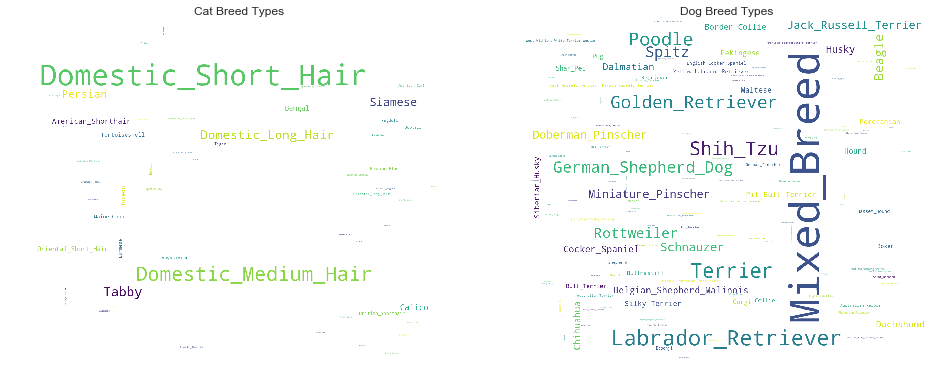

In [82]:
fig, ax = plt.subplots(figsize=(16, 12))
plt.subplot(1, 2, 1)

text_cat1 = ' '.join(
    vf.df_to_text(data_df_cat, 'Cat', 'Breed1')
)
text_cat2 = ' '.join(
    vf.df_to_text(data_df_cat, 'Cat', 'Breed2')
)
text_cat = text_cat1 + ' ' + text_cat2
vf.generate_word_clouds(text_cat, 'Cat Breed Types')

plt.subplot(1, 2, 2)
text_dog1 = ' '.join(
    vf.df_to_text(data_df_cat, 'Dog', 'Breed1')
)
text_dog2 = ' '.join(
    vf.df_to_text(data_df_cat, 'Dog', 'Breed2')
)
text_dog = text_dog1 + ' ' + text_dog2
vf.generate_word_clouds(text_dog, 'Dog Breed Types')

# Visualize Relation With Labels

In [20]:
main_count = data_df['AdoptionSpeed'].value_counts(normalize=True).sort_index()

def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting.
    
    I want to show how much higher/lower are the rates of Adoption speed for the current column comparing to base values (as described higher),
    At first I calculate base rates, then for each category in the column I calculate rates of Adoption speed and find difference with the base rates.
    """
    
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')  

/Users/jinli/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


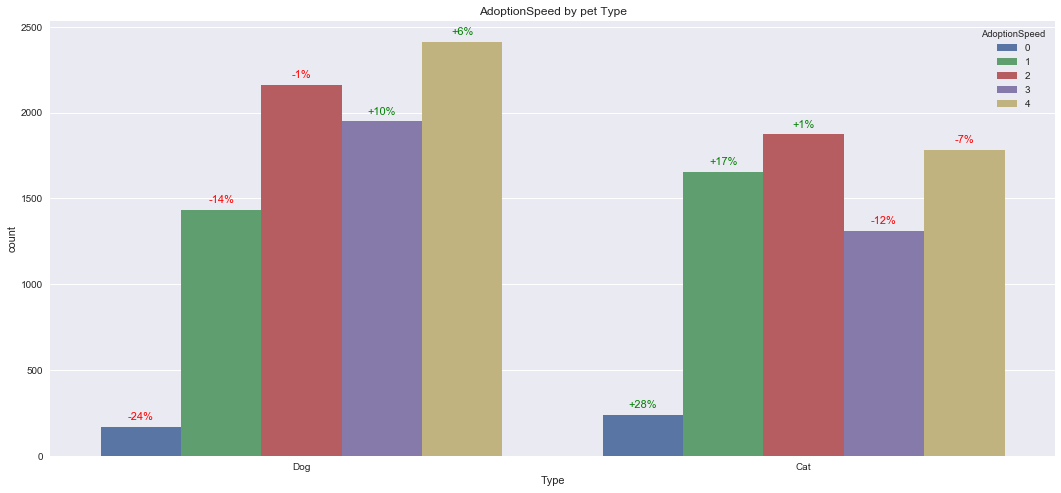

In [51]:
plt.figure(figsize=(18, 8))
make_count_plot(df=data_df, x='Type', title='by pet Type')

In [24]:
plot_dict = prepare_plot_dict(data_df, 'Type', main_count)

In [25]:
plot_dict

{170: -23.553741317049187,
 240: 27.917071037785135,
 1310: -12.160863692346311,
 1435: -14.378152872426952,
 1655: 17.041705168135252,
 1783: -7.1646250886028895,
 1873: 1.386504378299037,
 1949: 10.260167952925258,
 2164: -1.169799131764563,
 2414: 6.044822028148616}